In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
gosales = pd.read_csv('datasets/GoSales_Tx_LogisticRegression.csv')
gosales.head(3)

,IS_TENT,GENDER,AGE,MARITAL_STATUS,PROFESSION
0,False,M,27,Single,Professional
1,False,F,39,Married,Other
2,False,F,39,Married,Other


In [10]:
gosales.shape
pd.value_counts(gosales['IS_TENT'])

False    54241
True      6011
Name: IS_TENT, dtype: int64

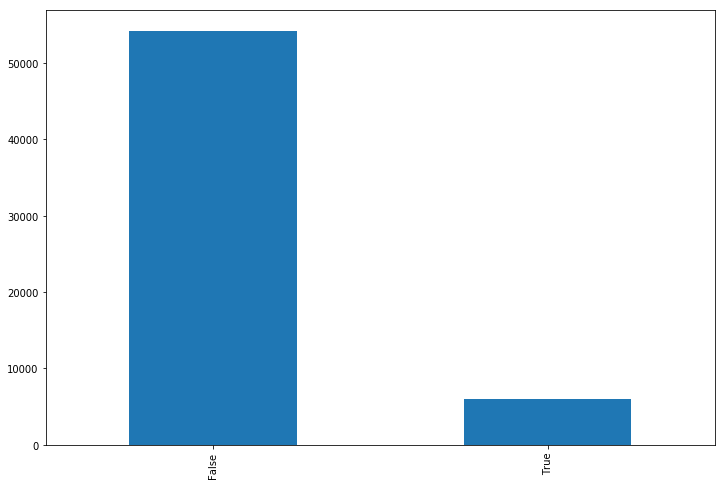

In [5]:
plt.figure(figsize=(12,8))
pd.value_counts(gosales['IS_TENT']).plot.bar()
plt.show()

In [11]:
gosales.AGE.describe()

count    60252.000000
mean        34.187479
std         10.105477
min         17.000000
25%         26.000000
50%         33.000000
75%         41.000000
max         69.000000
Name: AGE, dtype: float64

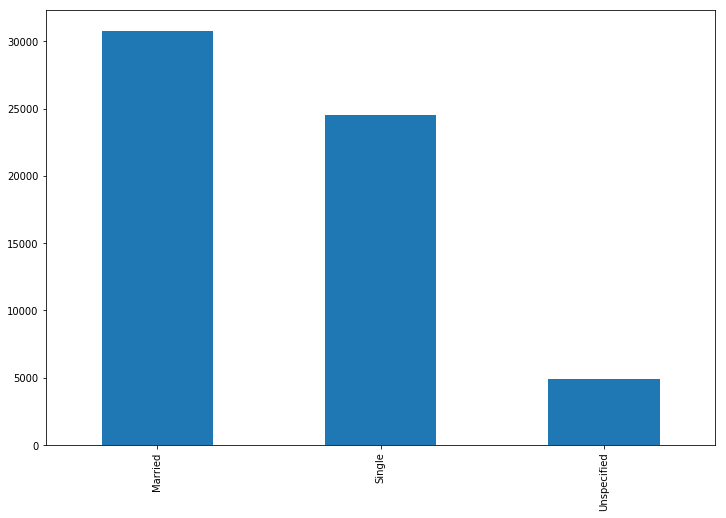

In [15]:
plt.figure(figsize=(12,8))
pd.value_counts(gosales['MARITAL_STATUS']).plot.bar()
plt.show()

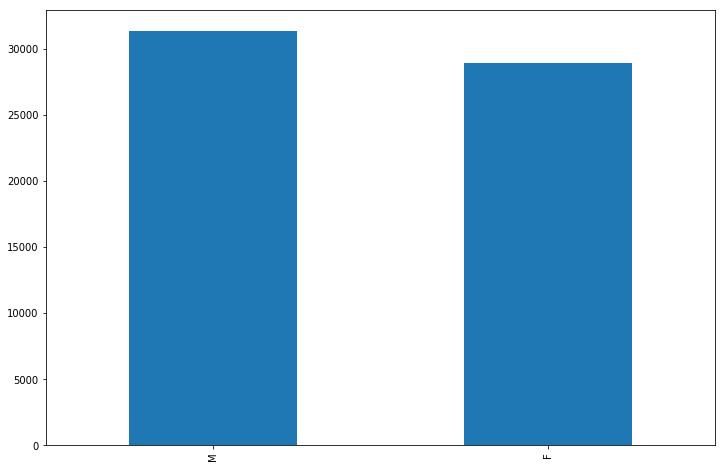

In [17]:
plt.figure(figsize=(12,8))
pd.value_counts(gosales['GENDER']).plot.bar()
plt.show()

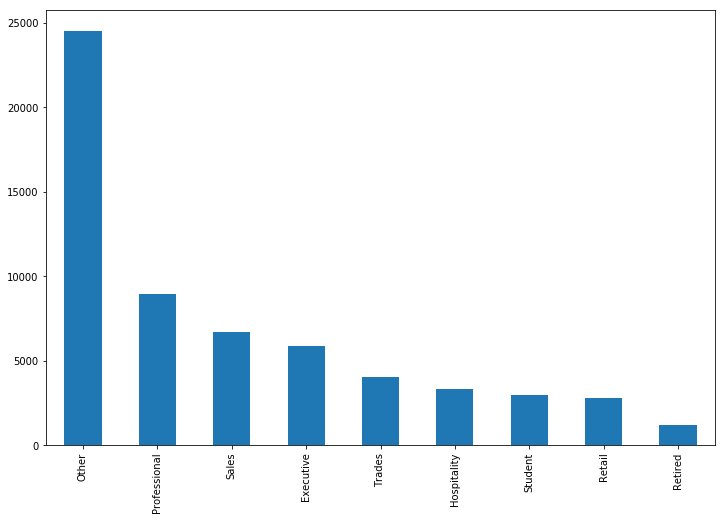

In [18]:
plt.figure(figsize=(12,8))
pd.value_counts(gosales['PROFESSION']).plot.bar()
plt.show()

In [51]:
# Perform LabelEncoding
gender = ['M', 'F']
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder = encoder.fit(gender)

In [52]:
gosales['GENDER'] = encoder.transform(gosales['GENDER'].astype(str))

In [53]:
gosales.sample(1)

,IS_TENT,GENDER,AGE,MARITAL_STATUS,PROFESSION
875,True,1,30,Married,Other


In [30]:
encoder.classes_

array(['F', 'M'], dtype='<U1')

In [54]:
gosales['MARITAL_STATUS'].unique()

array(['Single', 'Married', 'Unspecified'], dtype=object)

In [55]:
# Perform OneHotEncoding
from sklearn.preprocessing import OneHotEncoder
hot_encoder = OneHotEncoder()

In [56]:
hot_encoding = hot_encoder.fit(gosales['MARITAL_STATUS'].values.reshape(-1, 1))

In [37]:
hot_encoding.categories_

[array(['Married', 'Single', 'Unspecified'], dtype=object)]

In [57]:
_labels = hot_encoding.transform(gosales['MARITAL_STATUS'].values.reshape(-1,1)).toarray()

In [44]:
_labels[:,0]

array([0., 1., 1., ..., 1., 0., 1.])

In [58]:
label_df = pd.DataFrame()
label_df['MARITAL_STATUS_Married'] = _labels[:,0]
label_df['MARITAL_STATUS_Single'] = _labels[:,1]
label_df['MARITAL_STATUS_Unspecified'] = _labels[:,2]
label_df.head(3)

,MARITAL_STATUS_Married,MARITAL_STATUS_Single,MARITAL_STATUS_Unspecified
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0


In [59]:
encoded_df = pd.concat([gosales, label_df], axis=1)
encoded_df.drop(['MARITAL_STATUS'], axis=1, inplace=True)

In [60]:
encoded_df.head(5)

,IS_TENT,GENDER,AGE,PROFESSION,MARITAL_STATUS_Married,MARITAL_STATUS_Single,MARITAL_STATUS_Unspecified
0,False,1,27,Professional,0.0,1.0,0.0
1,False,0,39,Other,1.0,0.0,0.0
2,False,0,39,Other,1.0,0.0,0.0
3,False,0,56,Hospitality,0.0,0.0,1.0
4,False,1,45,Retired,1.0,0.0,0.0


In [61]:
gosales = pd.get_dummies(encoded_df, columns= ['PROFESSION'])
gosales.sample(5)

,IS_TENT,GENDER,AGE,MARITAL_STATUS_Married,MARITAL_STATUS_Single,MARITAL_STATUS_Unspecified,PROFESSION_Executive,PROFESSION_Hospitality,PROFESSION_Other,PROFESSION_Professional,PROFESSION_Retail,PROFESSION_Retired,PROFESSION_Sales,PROFESSION_Student,PROFESSION_Trades
6483,False,0,47,1.0,0.0,0.0,0,0,0,1,0,0,0,0,0
53346,False,0,58,1.0,0.0,0.0,0,0,1,0,0,0,0,0,0
31363,False,1,35,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0
40204,False,0,37,1.0,0.0,0.0,0,0,1,0,0,0,0,0,0
30186,False,1,37,1.0,0.0,0.0,0,0,0,0,0,0,0,0,1
